## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uplod File

In [ ]:
from google.colab import files
files.upload()

In [3]:
!ls

'Captain Tsubasa.zip'   sample_data


## Unzip File

In [4]:
!unzip 'Captain Tsubasa.zip'

Archive:  Captain Tsubasa.zip
  inflating: test.csv                
  inflating: train.csv               


## Read Train data

In [29]:
train = pd.read_csv('train.csv')
train.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
5,m_147,p_118,جریان بازی,سر,5.49,-1.50,1,0,کم,40,15,موقعیت از دست رفته
6,m_88,p_101,جریان بازی,سر,14.46,-1.25,3,0,متوسط,88,8,موقعیت از دست رفته
7,m_66,p_61,جریان بازی,سر,8.98,4.99,1,0,کم,10,29,موقعیت از دست رفته
8,m_132,p_84,جریان بازی,پای چپ,23.44,-1.25,3,0,متوسط,58,45,برخورد به دفاع
9,m_99,p_30,جریان بازی,پای چپ,8.48,3.99,2,1,متوسط,43,55,برخورد به دفاع


### Number of player

In [30]:
train['playerId'].nunique()

160

### Which player score most goal?

In [31]:
train[train['outcome'] == 'گُل']['playerId'].value_counts()

p_18     16
p_6      14
p_117    12
p_105    12
p_44     11
         ..
p_151     2
p_67      2
p_118     2
p_25      2
p_147     2
Name: playerId, Length: 160, dtype: int64

### Which players have most and less Goal's Rate

In [32]:
goal = train[train['outcome'] == 'گُل'].groupby(['playerId'])['playerId'].value_counts()
goal.shape

(160,)

In [33]:
total_shoot = train.groupby(['playerId'])['playerId'].value_counts()
total_shoot.shape

(160,)

In [34]:
goal_by_shoot = pd.DataFrame(goal / total_shoot)
goal_by_shoot

,,playerId
playerId,playerId,
p_1,p_1,0.149254
p_10,p_10,0.129630
p_100,p_100,0.102041
p_101,p_101,0.195652
p_102,p_102,0.180328
...,...,...
p_95,p_95,0.078431
p_96,p_96,0.116279
p_97,p_97,0.138462


In [35]:
print(np.argmax(goal / total_shoot))
print(np.argmin(goal / total_shoot))

70
53


In [36]:
print(goal_by_shoot.iloc[70])
print(goal_by_shoot.iloc[53])

playerId    0.253968
Name: (p_18, p_18), dtype: float64
playerId    0.028986
Name: (p_147, p_147), dtype: float64


### Calculate Euclidien Distance

In [37]:
train['distance'] = np.sqrt(train['x']**2 + train['y']**2)
train.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل,17.530810
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان,17.090313
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان,29.456534
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته,26.948560
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل,11.932141
5,m_147,p_118,جریان بازی,سر,5.49,-1.50,1,0,کم,40,15,موقعیت از دست رفته,5.691230
6,m_88,p_101,جریان بازی,سر,14.46,-1.25,3,0,متوسط,88,8,موقعیت از دست رفته,14.513928
7,m_66,p_61,جریان بازی,سر,8.98,4.99,1,0,کم,10,29,موقعیت از دست رفته,10.273291
8,m_132,p_84,جریان بازی,پای چپ,23.44,-1.25,3,0,متوسط,58,45,برخورد به دفاع,23.473306
9,m_99,p_30,جریان بازی,پای چپ,8.48,3.99,2,1,متوسط,43,55,برخورد به دفاع,9.371793


In [38]:
train.sort_values(['distance'], ascending=False)['distance']

7013    71.783221
4432    64.847711
6974    60.892618
3031    59.205683
1666    58.211343
          ...    
7553     1.581139
8495     1.274755
8607     1.030776
5332     0.790569
2822     0.353553
Name: distance, Length: 8925, dtype: float64

## Prediction

### Drop unnecessary columns

In [39]:
train = train.drop(['matchId', 'playerId', 'distance'], axis=1)
train.head(10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
5,جریان بازی,سر,5.49,-1.50,1,0,کم,40,15,موقعیت از دست رفته
6,جریان بازی,سر,14.46,-1.25,3,0,متوسط,88,8,موقعیت از دست رفته
7,جریان بازی,سر,8.98,4.99,1,0,کم,10,29,موقعیت از دست رفته
8,جریان بازی,پای چپ,23.44,-1.25,3,0,متوسط,58,45,برخورد به دفاع
9,جریان بازی,پای چپ,8.48,3.99,2,1,متوسط,43,55,برخورد به دفاع


In [40]:
train.groupby(['outcome'])['outcome'].value_counts()

outcome               outcome             
برخورد به تیردروازه   برخورد به تیردروازه      174
برخورد به دفاع        برخورد به دفاع          1771
مهار توسط دروازه بان  مهار توسط دروازه بان    2395
موقعیت از دست رفته    موقعیت از دست رفته      3470
گُل                   گُل                     1081
گُل به خودی           گُل به خودی               34
Name: outcome, dtype: int64

In [41]:
train.columns

Index(['playType', 'bodyPart', 'x', 'y', 'interveningOpponents',
       'interveningTeammates', 'interferenceOnShooter', 'minute', 'second',
       'outcome'],
      dtype='object')

In [42]:
train['outcome'] = np.where(train['outcome'] == 'گُل',
                                          1,
                                          train['outcome'])
train['outcome'] = np.where(train['outcome'] == 'گُل به خودی',
                                          1,
                                          train['outcome'])

train.head(10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,1
1,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,1
5,جریان بازی,سر,5.49,-1.50,1,0,کم,40,15,موقعیت از دست رفته
6,جریان بازی,سر,14.46,-1.25,3,0,متوسط,88,8,موقعیت از دست رفته
7,جریان بازی,سر,8.98,4.99,1,0,کم,10,29,موقعیت از دست رفته
8,جریان بازی,پای چپ,23.44,-1.25,3,0,متوسط,58,45,برخورد به دفاع
9,جریان بازی,پای چپ,8.48,3.99,2,1,متوسط,43,55,برخورد به دفاع


### X and Y separation

In [43]:
X_train = train.loc[:, train.columns != 'outcome'].values
y_train = train['outcome'].values
y_train = y_train == 1

### One Hot Encoding For 'playType', 'bodyPart' and 'interferenceOnShooter' columns

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,6])], remainder='passthrough')

In [45]:
X_train = ct.fit_transform(X_train)
print(X_train.shape)
X_train

(8925, 18)


array([[1.0, 0.0, 0.0, ..., 0, 70, 9],
       [1.0, 0.0, 0.0, ..., 0, 55, 4],
       [0.0, 1.0, 0.0, ..., 2, 86, 31],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 84, 34],
       [1.0, 0.0, 0.0, ..., 0, 4, 39],
       [1.0, 0.0, 0.0, ..., 0, 72, 17]], dtype=object)

### Label Encoding Targets:

In [46]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([1, 0, 0, ..., 0, 0, 0])

## Read Test data

In [47]:
test = pd.read_csv('test.csv')
test.head(10)

,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter
0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم
1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم
2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط
3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد
4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم
5,83,16,10.97,11.22,جریان بازی,پای راست,2,0,متوسط
6,13,34,55.36,2.99,جریان بازی,پای چپ,2,0,کم
7,12,50,25.69,-17.46,جریان بازی,پای چپ,4,0,کم
8,61,19,28.93,7.98,جریان بازی,پای راست,2,0,کم
9,92,59,4.49,6.48,جریان بازی,پای راست,2,0,زیاد


### Change test columns in order to look like train data

In [48]:
test = test[['playType', 'bodyPart', 'x', 'y', 'interveningOpponents',
       'interveningTeammates', 'interferenceOnShooter', 'minute', 'second']]
test.head(10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second
0,جریان بازی,سر,6.98,-5.49,1,0,کم,76,7
1,جریان بازی,پای چپ,27.43,1.00,2,1,کم,81,18
2,جریان بازی,پای چپ,13.47,-1.00,4,0,متوسط,86,50
3,جریان بازی,پای راست,9.23,-9.23,1,0,زیاد,69,39
4,جریان بازی,پای راست,10.72,-8.48,2,1,کم,53,15
5,جریان بازی,پای راست,10.97,11.22,2,0,متوسط,83,16
6,جریان بازی,پای چپ,55.36,2.99,2,0,کم,13,34
7,جریان بازی,پای چپ,25.69,-17.46,4,0,کم,12,50
8,جریان بازی,پای راست,28.93,7.98,2,0,کم,61,19
9,جریان بازی,پای راست,4.49,6.48,2,0,زیاد,92,59


### Get X test and Encod it

In [49]:
X_test = test.values
X_test = ct.transform(X_test)
X_test

array([[1.0, 0.0, 0.0, ..., 0, 76, 7],
       [1.0, 0.0, 0.0, ..., 1, 81, 18],
       [1.0, 0.0, 0.0, ..., 0, 86, 50],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 8, 33],
       [1.0, 0.0, 0.0, ..., 0, 53, 42],
       [1.0, 0.0, 0.0, ..., 0, 31, 7]], dtype=object)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(8925, 18)
(8925,)
(2000, 18)


### Standardize test and train data

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Use Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier_LR = LogisticRegression(random_state = 42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [53]:
y_pred_lr = classifier_LR.predict(X_test)
sol = pd.DataFrame({'prediction': y_pred_lr})
sol.head(10)

,prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Save output of Logisti Regression

In [ ]:
sol.to_csv('output_lr.csv')

### Use SVM

In [54]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 42)
classifier_SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [55]:
y_pred_svm = classifier_SVM.predict(X_test)
sol = pd.DataFrame({'prediction': y_pred_svm})
sol.head(10)

,prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Save output of SVM

In [ ]:
sol.to_csv('output_svm.csv')

### Create our ANN

In [62]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = keras.Sequential(
    [
        layers.Dense(18, input_dim=X_train.shape[-1], activation="relu", name="input"),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(128, activation="relu", name="layer3"),
        layers.Dense(32, activation="relu", name="layer4"),
        layers.Dense(1, activation="sigmoid", name="output")
    ],
    name="ANN_Model"
)
model.summary()

Model: "ANN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 18)                342       
                                                                 
 layer1 (Dense)              (None, 64)                1216      
                                                                 
 layer2 (Dense)              (None, 256)               16640     
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 32)                4128      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 55,255
Trainable params: 55,255
Non-trainab

#### Plot ANN Model

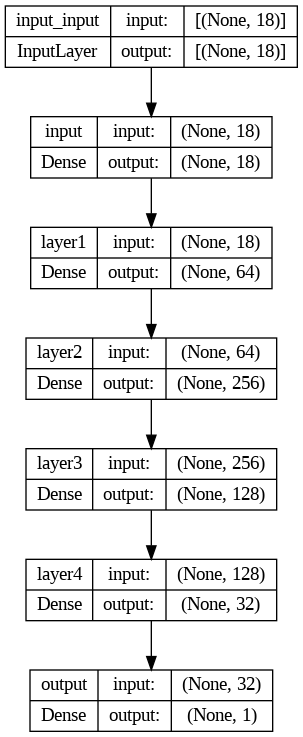

In [63]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Compile and Fit Model

In [64]:
model.compile(
        loss="binary_crossentropy", 
        optimizer="adam",
        metrics=["accuracy"]
    )
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
279/279 - 1s - loss: 0.3481 - accuracy: 0.8839 - 1s/epoch - 5ms/step
Epoch 2/100
279/279 - 1s - loss: 0.3133 - accuracy: 0.8859 - 706ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.3070 - accuracy: 0.8878 - 1s/epoch - 4ms/step
Epoch 4/100
279/279 - 1s - loss: 0.3044 - accuracy: 0.8884 - 997ms/epoch - 4ms/step
Epoch 5/100
279/279 - 1s - loss: 0.3005 - accuracy: 0.8884 - 751ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 0.2974 - accuracy: 0.8891 - 732ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 0.2957 - accuracy: 0.8894 - 787ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 0.2921 - accuracy: 0.8909 - 1s/epoch - 4ms/step
Epoch 9/100
279/279 - 1s - loss: 0.2940 - accuracy: 0.8890 - 1s/epoch - 5ms/step
Epoch 10/100
279/279 - 1s - loss: 0.2908 - accuracy: 0.8902 - 1s/epoch - 4ms/step
Epoch 11/100
279/279 - 1s - loss: 0.2887 - accuracy: 0.8917 - 940ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 0.2867 - accuracy: 0.8912 - 862ms/epoch - 3ms/step
Epoc

#### Predict

In [65]:
y_pred_nn = model.predict(X_test)
sol = pd.DataFrame({'prediction': y_pred_nn.reshape(-1)})
sol.head(10)

63/63 [==============================] - 0s 2ms/step


,prediction
0,1.659627e-02
1,8.104411e-20
2,8.591824e-06
3,1.656190e-03
4,5.347336e-02
5,2.043669e-03
6,0.000000e+00
7,1.029571e-34
8,2.756134e-14
9,7.686604e-21


#### Save output of ANN

In [ ]:
sol.to_csv('output_nn.csv')